# Multiclass classification: The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset

In this tutorial, we will implement a simple convolutional network based on the VGG-16 architecture, which we will apply to multiclass image classification. We will use the CIFAR-10 dataset, a standard for this type of (elementary) problem.


In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Load the CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 color images from 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Several sample images are shown below, along with the class names.

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png"
             style="width:500px;"></center>
<caption><center><b> Figure 1: Some images of the database</b></center></caption>

In [2]:
from tensorflow.keras.datasets import cifar10

Since the CIFAR-10 dataset is included in _TensorFlow_, we can load the dataset using the _load_data()_ function.

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


##### <i style="color:purple">**Exercise**: Display sample images from the dataset.</i>

It is always a good idea to inspect some images in a dataset. Display a sample image, with its associated label as a title.

In [4]:
# Defining array. Each item of array represent integer value of labels. 10 items for 10 labels.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [5]:
%%script echo skipping
## TO COMPLETE ##

plt.figure(figsize=(18, 9))

[...]

plt.show()

skipping


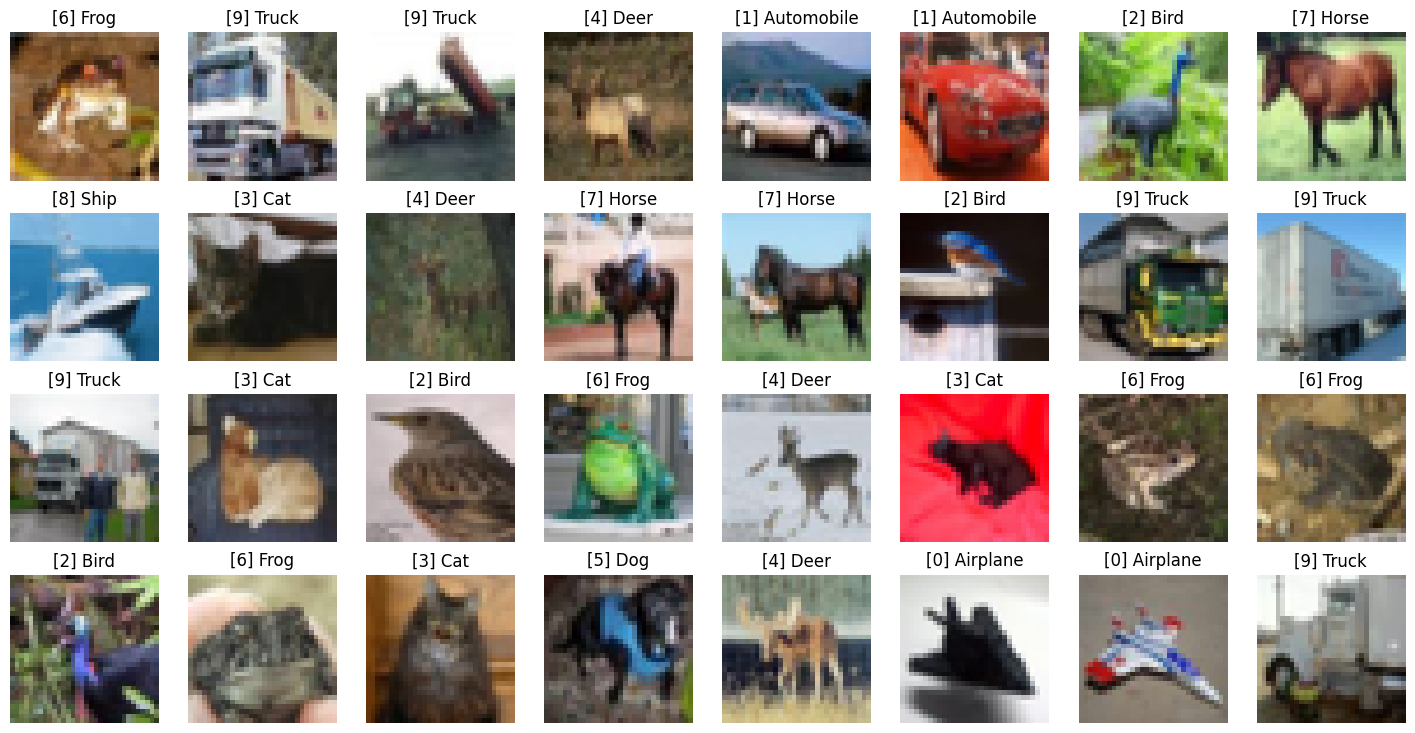

In [6]:
# %load solutions/cifar10/data_visualization.py

plt.figure(figsize=(18, 9))

n_rows = 4
n_cols = 8

# plot each of the images in the batch and the associated ground truth labels
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    title = '['+y_train[i][0].astype('str')+'] '+class_names[y_train[i][0]]
    plt.title(title)
    plt.axis("off")

#plt.tight_layout()
plt.show()

Remember, the images in CIFAR-10 are quite small, only 32×32 pixels, so while they do not have much detail, there is still enough information in these images to support an image classification task.

##### <i style="color:purple">**Exercise**: Preprocess the data.</i>

* Normalize the image data to the range $[0,1]$.
* Convert the integer labels to one-hot encoded labels. Pour ce faire, on pourra utiliser la fonction [_to_categorical()_](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
%%script echo skipping
## TO COMPLETE ##

[...]

skipping


In [9]:
# %load solutions/cifar10/data_preprocessing.py

# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## CNN Model Implementation

This section will define a simple CNN model in Keras and train it on the CIRFAR-10 dataset.

The simple model we propose is shown in Figure 2. Its structure is similar to that of the VGG-16. However, it has fewer layers, and the size of the input images is much smaller, considerably reducing the number of trainable parameters. More specifically, this model contains three convolutional blocks and a fully connected layer - our classifier.
The figure shows the number of filters at the end of each convolutional block, as well as the size of the convolution output images.

To be more precise:
* The first convolutional block is composed of two convolutional layers with 32 filters each, followed by a max pooling layer with a stride of 2 so that the output shape from this first convolutional block is (16×16 x32).
* The second convolutional block is nearly identical to the first but with 64 filters in each convolutional layer instead of 32.
* Finally, the third convolutional block is an exact copy of the second one.

<center><img src="https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-architecture.png"
             style="width:800px;"></center>
<caption><center><b> Figure 2: CNN architecture</b></center></caption>
<br>

_**Note:** The number of filters in each convolutional layer is something that you will need to experiment with. A larger number of filters allows the model to have a greater learning capacity, but this also needs to be balanced with the amount of data available to train the model. Adding too many filters (or layers) can lead to overfitting, one of the most common issues encountered when training models._

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

##### <i style="color:purple">**Exercise**: Define the CNN architecture.</i>

Define a _cnn_model()_ function that instantiates the network described above.

In [11]:
%%script echo skipping
## TO COMPLETE ##

def cnn_model(input_shape=(32, 32, 3)):

    [...]

    return model

skipping


In [12]:
# %load solutions/cifar10/cnn_model.py

def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()
    model.add(Input(shape=input_shape))

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [13]:
model = cnn_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

### Training

For training, you can use the following hyperparameters :
* `batch_size` = 256
* `epochs` = 30

##### <i style="color:purple">**Exercise**: Compile and train the model.</i>

You will use the _rmsprop_ optimizer, and track _accuracy_. For training, you can use the _validation_split_ agument to reserve 30% of the dataset for model validation.

In [14]:
%%script echo skipping
## TO COMPLETE ##

batch_size = 256
epochs = 30

[...]

history = ...

skipping


In [15]:
# %load solutions/cifar10/cnn_train.py

batch_size = 256
epochs = 30

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
             )

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_split = .3,
                   )

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.1709 - loss: 2.2147 - val_accuracy: 0.3342 - val_loss: 1.7987
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3464 - loss: 1.7935 - val_accuracy: 0.4457 - val_loss: 1.5261
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4308 - loss: 1.5742 - val_accuracy: 0.4983 - val_loss: 1.4001
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4949 - loss: 1.4022 - val_accuracy: 0.4953 - val_loss: 1.4006
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5601 - loss: 1.2332 - val_accuracy: 0.5384 - val_loss: 1.2806
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6094 - loss: 1.1119 - val_accuracy: 0.6289 - val_loss: 1.0582
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6475 - loss: 0.9945 - val_accuracy: 0.5816 - val_loss: 1.2216
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6789 - loss: 0.9087 - val_ac

_**Note**: The _validation_split_ argument reserves the last % of the training dataset for validation. This approach is very convenient, but if the training data set has a specific order (for example, order by classes), you must take steps to randomize the order before proceeding with the split._

##### <i style="color:purple">**Exercise** : Visualize the evolution of metrics during training.</i>

You will write a function displaying the evolution of metrics during training, on the training and validation sets. Display accuracy and loss on separate figures.

In [16]:
%%script echo skipping
## TO COMPLETE ##

def plot_training_analysis():
    [...]

skipping


In [17]:
# %load solutions/cifar10/plot_training_analysis.py

def plot_training_analysis():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', linestyle="--",label='Training accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
    plt.plot(epochs, val_loss,'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

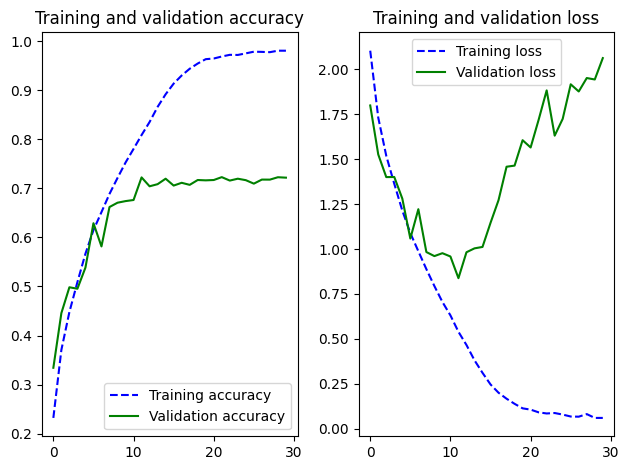

In [18]:
plot_training_analysis()

The results from our baseline model reveal that the model is **overfitting**. Notice that the validation loss increases after about ten epochs of training while the training loss continues to decline. This means the network learns to model the training data well but does not generalize to unseen test data. The accuracy plot shows a similar trend where the validation accuracy levels off after about ten epochs while the training accuracy approaches 100% as training progresses.

This is a common problem when training neural networks and can occur for several reasons. One reason is that the model can fit the nuances of the training dataset, especially when the training dataset is small.

## Adding dropout to the model

To help mitigate this problem, we can employ one or more regularization strategies to help the model generalize better. Regularization techniques help to restrict the model’s flexibility so that it does not overfit the training data.
Dropout is implemented in Keras as a particular layer type that randomly drops a percentage of neurons during training. When dropout is used in convolutional layers, usually after the max pooling layer, it eliminates a percentage of neurons in the feature maps. When used after a dense layer, a percentage of neurons in the fully connected layer are dropped.

##### <i style="color:purple">**Exercise** : Add dropout to previous CNN.</i>

Add a dropout layer at the end of each convolutional block and also after the first dense layer in the classifier. The input argument to the Dropout function is the fraction of neurons to (randomly) drop from the previous layer during the training process.

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
%%script echo skipping
## TO COMPLETE ##

def cnn_model_dropout(input_shape=(32, 32, 3)):

    [...]

    return model

skipping


In [21]:
# %load solutions/cifar10/cnn_model_dropout.py

def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()
    model.add(Input(shape=input_shape))

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [22]:
model = cnn_model_dropout()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

##### <i style="color:purple">**Exercise**: Compile and train the model.</i>

Use the same parameters as previously.

In [23]:
%%script echo skipping
## TO COMPLETE ##

batch_size = 256
epochs = 30

[...]

history = ...

skipping


In [24]:
# %load solutions/cifar10/cnn_train.py

batch_size = 256
epochs = 30

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
             )

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_split = .3,
                   )

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.1624 - loss: 2.2398 - val_accuracy: 0.2964 - val_loss: 1.9559
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3073 - loss: 1.9122 - val_accuracy: 0.4009 - val_loss: 1.6216
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3824 - loss: 1.6972 - val_accuracy: 0.4459 - val_loss: 1.5448
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4382 - loss: 1.5608 - val_accuracy: 0.4761 - val_loss: 1.4751
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4870 - loss: 1.4230 - val_accuracy: 0.5264 - val_loss: 1.3003
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5235 - loss: 1.3302 - val_accuracy: 0.5821 - val_loss: 1.1726
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5503 - loss: 1.2552 - val_accuracy: 0.5712 - val_loss: 1.2114
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5811 - loss: 1.1727 - val_acc

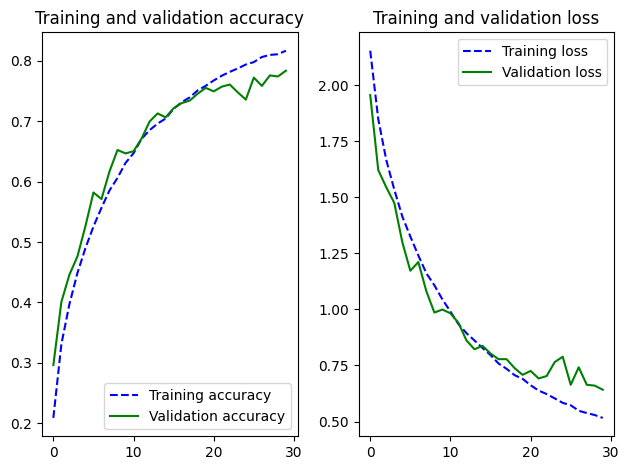

In [25]:
plot_training_analysis()

In the graphs above, the training curves align very closely with the validation curves. Note also that we achieve higher validation accuracy than the baseline model, which contained no dropouts.

## Evaluate the model on the test dataset

We can now predict the results for all the test images, as shown in the code below.

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7860 - loss: 0.6473
Test accuracy: 78.230


##### <i style="color:purple">**Exercise**: Evaluate the model.</i>

Write an _evaluate_model()_ function that, given a dataset and a model:
* Selects a batch of data,
* Determines the labels predicted by the model for this data,
* Displays the selected images, comparing the true and predicted labels as titles. The titles will be colored green when the two labels coincide and red when they do not. <br>
The [_plt.setp_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html) function is used to change the style of an object via the `plt.setp(obj, style)` synthaxis.
* Counts the number of correctly predicted labels and displays the percentage of correct predictions.

In [27]:
%%script echo skipping
## TO COMPLETE ##

def evaluate_model(dataset, model):

    class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    n_rows = 3
    n_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = ...

    # Get predictions from model.
    predictions = ...

    plt.figure(figsize=(20, 8))
    n_matches = 0

    for idx in range(n_rows*n_cols):
        ax = plt.subplot(...)
        [...]

        pred_idx = ...
        truth_idx = np.nonzero(y_test[idx])

        title = ...
        title_obj = plt.title(title, fontdict={'fontsize':13})

        [...]

        acc = ...
    print("Prediction accuracy: ", int(100*acc)/100)

    return

skipping


In [28]:
# %load solutions/cifar10/evaluate_model.py

def evaluate_model(dataset, model):

    class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    n_rows = 3
    n_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:n_rows*n_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    n_matches = 0

    for idx in range(n_rows*n_cols):
        ax = plt.subplot(n_rows, n_cols, idx+1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " | " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            n_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = n_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Prediction accuracy:  1.0


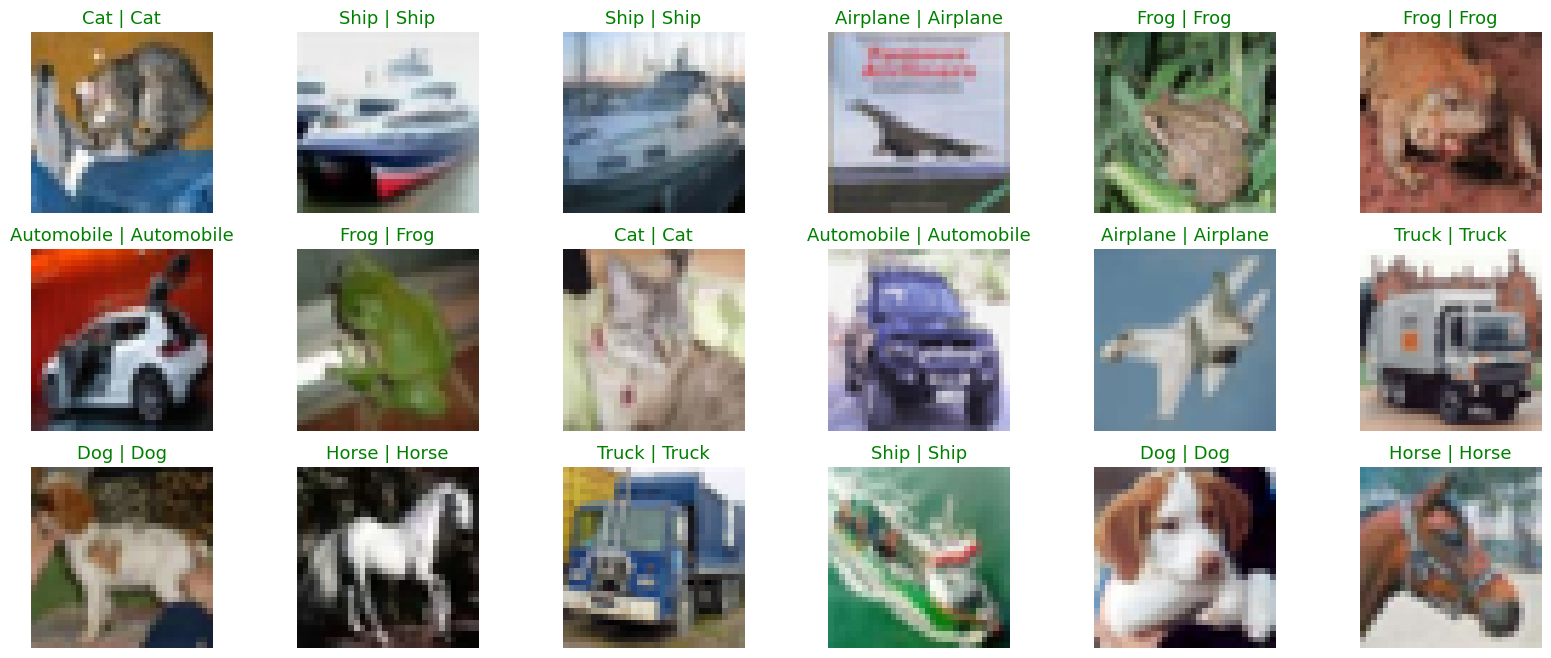

In [29]:
evaluate_model(X_test, model)

##### <i style="color:purple">**Exercise**: Visualize the confusion matrix.</i>

A confusion matrix is a very common metric used to summarize a classification problem's results. The information is presented as a table or matrix where one axis represents the ground truth labels for each class, and the other axis represents the predicted labels from the network. The entries in the table represent the number of instances from an experiment (sometimes represented as percentages rather than counts). Generating a confusion matrix in TensorFlow is accomplished by calling the _tf.math.confusion_matrix()_ function, which takes two required arguments: the list of ground truth labels and the associated predicted labels.

Be careful to compare labels that are only encoded in the same way (one-hot vs. label encoding !).

In [30]:
import seaborn as sn

In [31]:
%%script echo skipping
## TO COMPLETE ##

[...]

# Generate a confusion matrix for the test dataset.
cm = ...

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

skipping


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


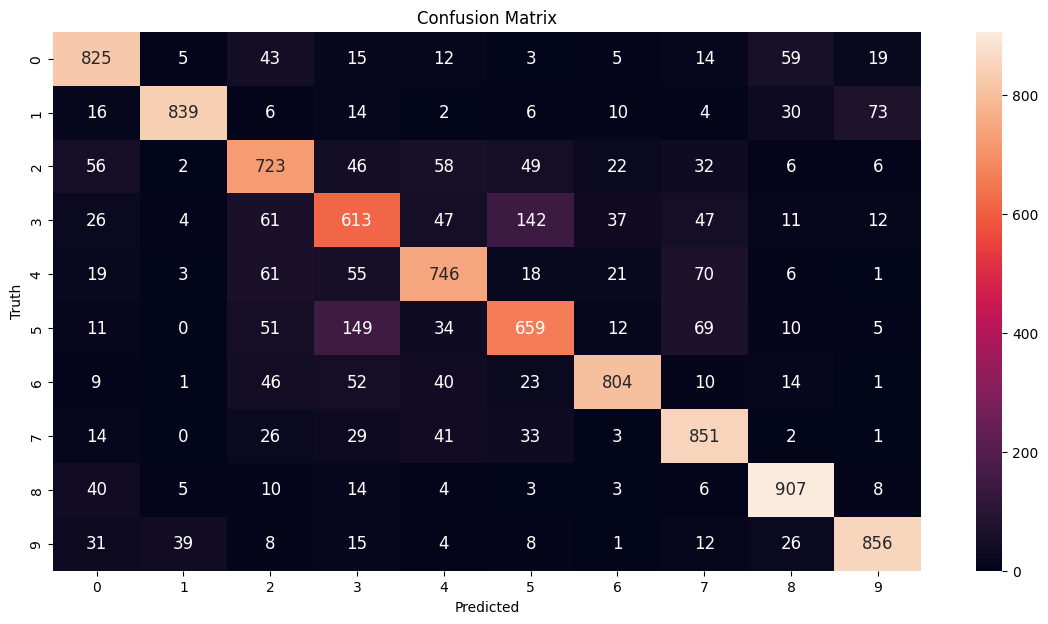

In [32]:
# %load solutions/cifar10/ConfusionMatrix.py

# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

A confusion matrix is a content-rich representation of a model's class-level performance. It can be very instructive in better understanding the areas in which the model performs well and those in which it may have more difficulty.

Here, for example, a few things stand out immediately. Two of the ten classes tend to be misclassified more than the others: Dogs and Cats. Specifically, when the input image is a cat (index 3), it is often misclassified as a dog, with 176 misclassified samples. When the input image is a dog (index 5), the most misclassified examples are cats, with 117 samples.
Note also that the last row, representing trucks, is most often confused with cars. All these observations make intuitive sense, given the classes' similarity.